Speciific requirements for the report
Each group will create a final electronic report (max 2000 written words, not including citations) using Jupyter to communicate the question asked, the analysis performed and the conclusion reached.

**Title:** Apple Production Data Analysis

**Introduction:**
- Over the last two decades, food production has increased and evolved to accommodate the exponential increase in the world population. In turn, this situation resulted in an alarming rise in food waste. Currently, around one-third of the total food production goes to waste and 45% of this accounts for fruits and vegetables. Being able to understand the factors and conditions that contribute to harvesting better quality produce allows farmers and producers to optimize their cultivation process which can greatly improve their yield. Analyzing  trends and patterns in  recent data also benefits production companies looking to increase their profits and ensure customer satisfaction.

- In this project, we aimed to answer the question: Is there a way to predict whether a newly harvested apple shows an overall ‘good’ or ‘bad’ quality using a particular set of variables?

- To answer our question, we analyzed  the ‘Apple Quality’ dataset from Kaggle. It is a robust datset that contains information about the apple production of an Amerian agriculture company. The data is composed of 9 columns that divide the various components of a fruit including its size, weight, acidity, etc.

**Methods & Results:**

- Loading libraries


In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)
library(cowplot)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

- Reading files from the web

In [2]:
download.file("https://raw.githubusercontent.com/Dana-Te/DSCI-100-G41-Apples-Data-Set/main/apple_quality.csv", "apple_quality.csv")
apple_data<- read_csv("apple_quality.csv")
apple_data

Rows: 4001 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Acidity, Quality
dbl (7): A_id, Size, Weight, Sweetness, Crunchiness, Juiciness, Ripeness

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.491590483,good
1,-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.722809367,good
2,-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.621636473,bad
3,-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.790723217,good
4,1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.501984036,good
5,-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.981523169,bad
6,1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.414170509,good
7,-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.470125066,good
8,-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.871904758,bad


- Cleaned & wrangled data into a tidy table for use

In [3]:
apple_data_wrangled<- apple_data|>
    filter(A_id!="NA")|>
    select(Size:Quality)|>
    mutate(Acidity=as.numeric(as.character(Acidity)),
           Size	= as.numeric(Size),
           Weight = as.numeric(Weight),
           Sweetness = as.numeric(Sweetness),
           Crunchiness = as.numeric(Crunchiness),
           Juiciness = as.numeric(Juiciness),
           Ripeness = as.numeric(Ripeness),
           Quality = as.factor(Quality))

cat("Table 1.0: Wrangled Apple Data")
apple_data_wrangled
#The data was already tidy and needed not much wrangling.

Table 1.0: Wrangled Apple Data

Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-3.97004852,-2.5123364,5.3463296,-1.01200871,1.8449004,0.32983980,-0.4915905,good
-1.19521719,-2.8392565,3.6640588,1.58823231,0.8532858,0.86753008,-0.7228094,good
-0.29202386,-1.3512820,-1.7384292,-0.34261593,2.8386355,-0.03803333,2.6216365,bad
-0.65719577,-2.2716266,1.3248738,-0.09787472,3.6379705,-3.41376134,0.7907232,good
1.36421682,-1.2966119,-0.3846582,-0.55300577,3.0308744,-1.30384943,0.5019840,good
-3.42539975,-1.4090822,-1.9135112,-0.55577486,-3.8530715,1.91461592,-2.9815232,bad
1.33160574,1.6359557,0.8759742,-1.67779794,3.1063445,-1.84741673,2.4141705,good
-1.99546210,-0.4289585,1.5306436,-0.74297168,0.1588340,0.97443786,-1.4701251,good
-3.86763223,-3.7345136,0.9864291,-1.20765455,2.2928729,4.08092079,-4.8719048,bad


- Compute summary data statistics

In [4]:
apple_data_mean<- apple_data_wrangled|>
    select(Size:Acidity)|>
    mutate(Acidity=as.numeric(Acidity))|>
    map_df(mean, na.rm=TRUE)

apple_data_quality<-apple_data|>
    filter(A_id!="NA")|>
    select(Quality)|>
    group_by(Quality) |> 
    summarise(Count = n())|>
    pivot_wider(names_from=Quality, values_from=Count)

merge<- cross_join(apple_data_mean, apple_data_quality)

cat("Table 1.1: Summary Data Statistics With the Mean Value of Variables and the Total of each Quality Class")
merge
#The 'Merge' table consists of the mean for all the variables (Size to Ripeness), 
#and the number of rows in each classification from Quality( bad or good).

Table 1.1: Summary Data Statistics With the Mean Value of Variables and the Total of each Quality Class

Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,bad,good
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
-0.5030146,-0.9895465,-0.4704785,0.9854779,0.512118,0.4982774,0.0768773,1996,2004


- Creating distributions based on each column variable from the apple data set, separated for good and bad classes

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”
Warning me

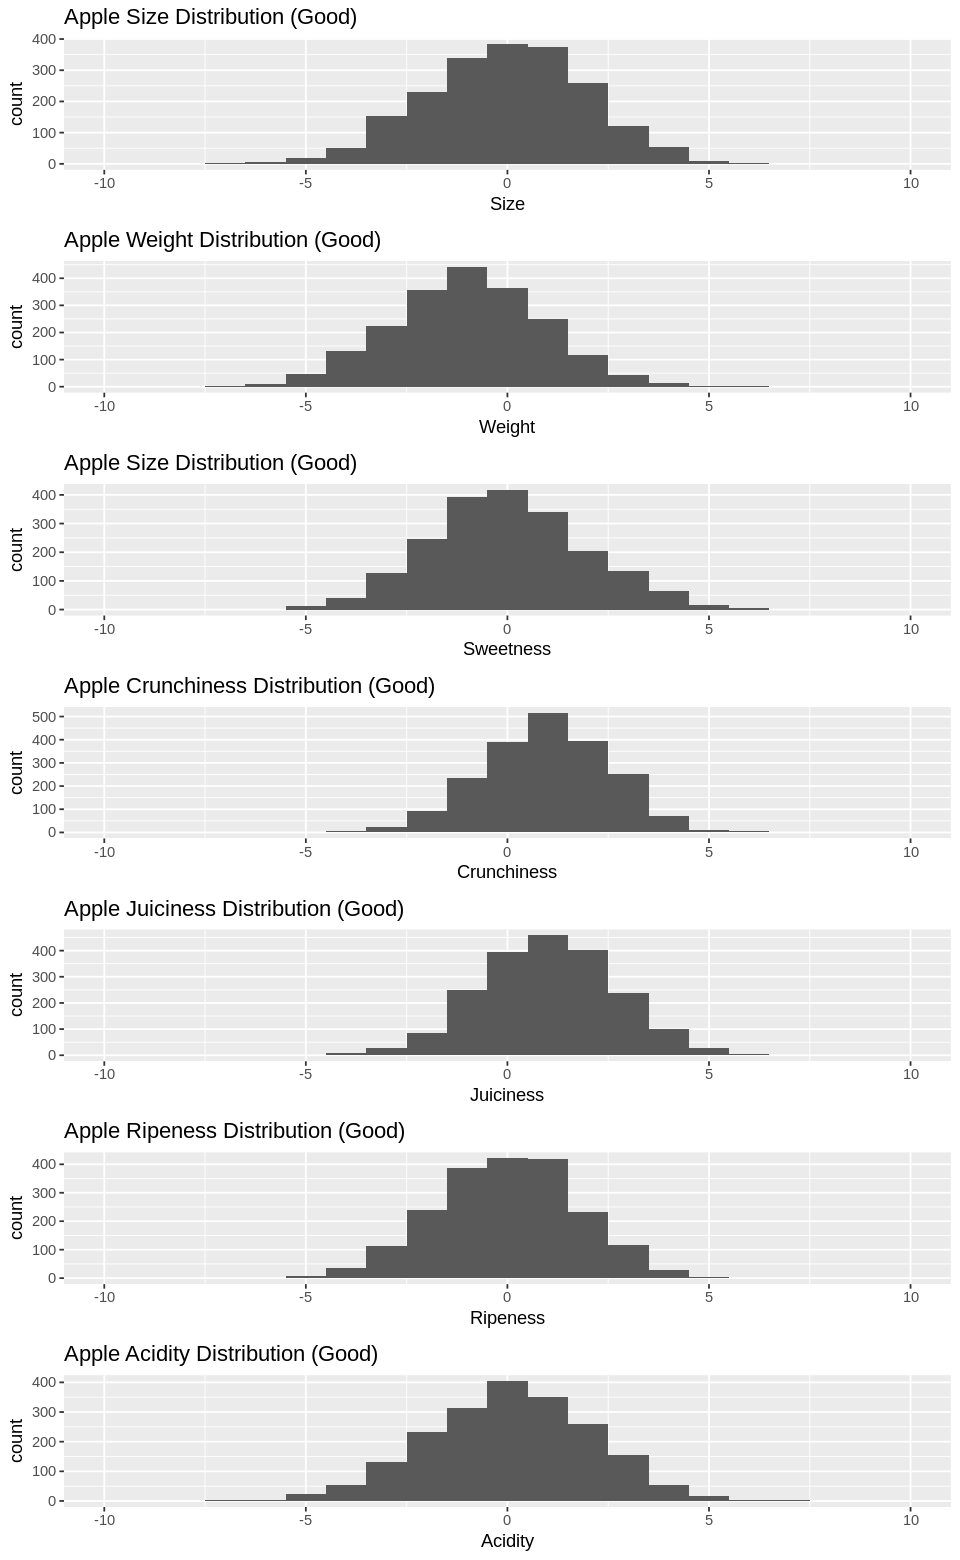

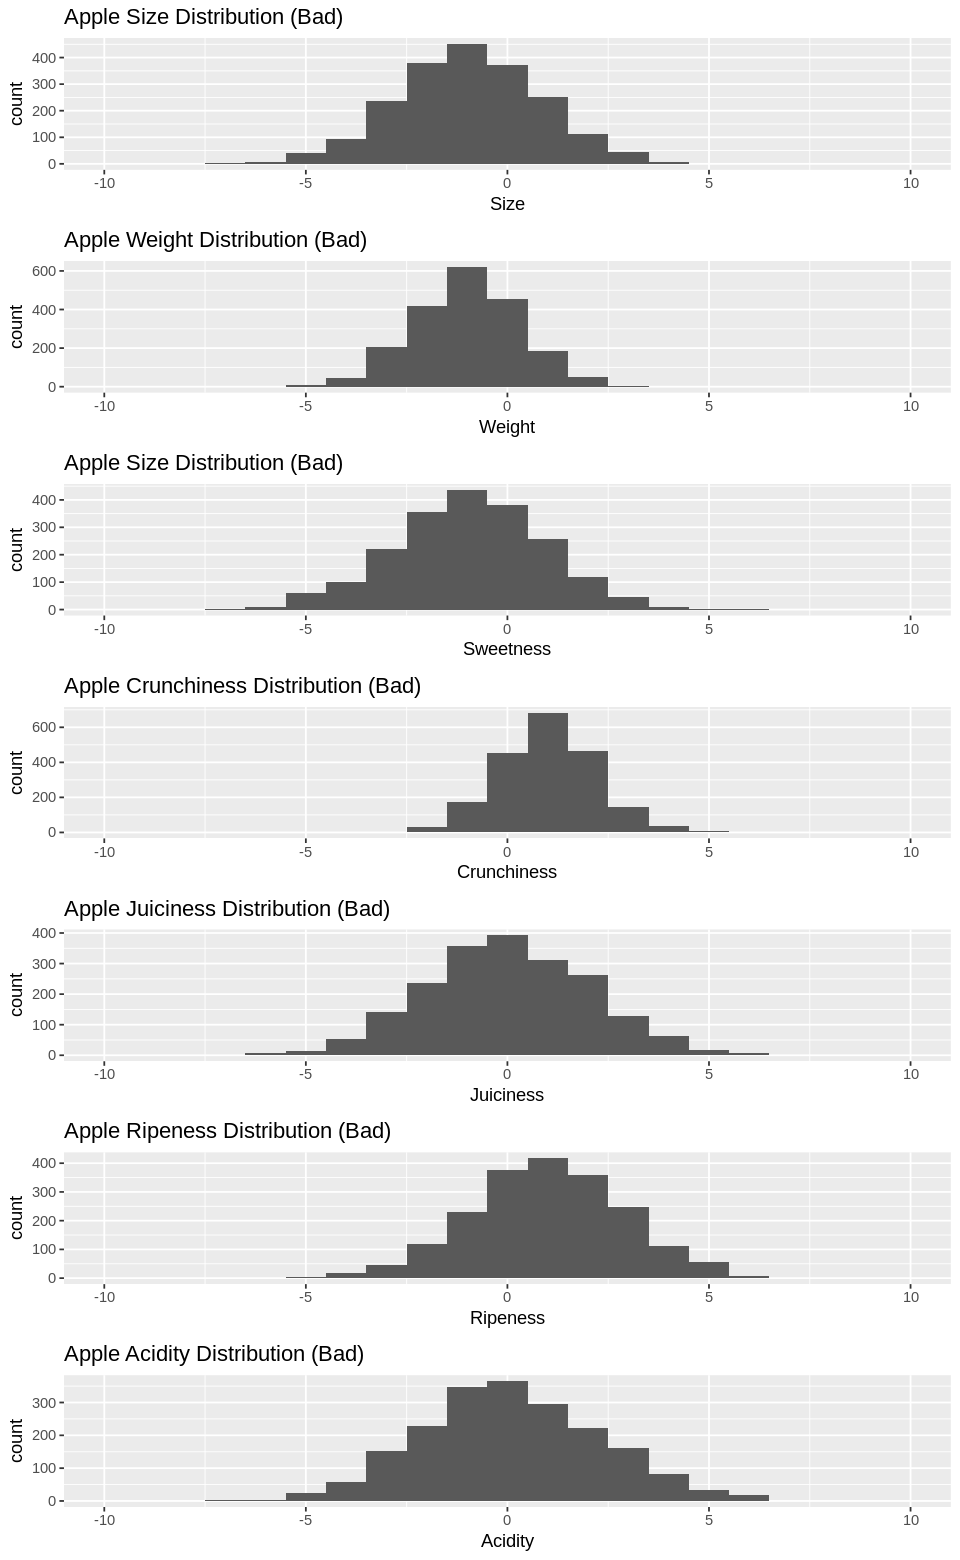

In [15]:
options(repr.plot.width = 8, repr.plot.height = 13)

apple_data_good <- apple_data_wrangled |>
     filter(Quality == 'good')

apple_data_bad <- apple_data_wrangled |>
     filter(Quality == 'bad')

size_dist_good <- ggplot(apple_data_good, aes(Size), col = 'red') + 
    geom_histogram(binwidth = 1) +
    labs(x = "Size") +
    ggtitle("Apple Size Distribution (Good)") +
    xlim(c(-10, 10))

size_dist_bad <- ggplot(apple_data_bad, aes(Size)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Size") +
    ggtitle("Apple Size Distribution (Bad)") +
    xlim(c(-10, 10))

weight_dist_good <- ggplot(apple_data_good, aes(Weight)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Weight") +
    ggtitle("Apple Weight Distribution (Good)") +
    xlim(c(-10, 10))

weight_dist_bad <- ggplot(apple_data_bad, aes(Weight)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Weight") +
    ggtitle("Apple Weight Distribution (Bad)") +
    xlim(c(-10, 10))

sweetness_dist_good <- ggplot(apple_data_good, aes(Sweetness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Sweetness") +
    ggtitle("Apple Size Distribution (Good)") +
    xlim(c(-10, 10))

sweetness_dist_bad <- ggplot(apple_data_bad, aes(Sweetness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Sweetness") +
    ggtitle("Apple Size Distribution (Bad)") +
    xlim(c(-10, 10))

crunchiness_dist_good <- ggplot(apple_data_good, aes(Crunchiness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Crunchiness") +
    ggtitle("Apple Crunchiness Distribution (Good)") +
    xlim(c(-10, 10))

crunchiness_dist_bad <- ggplot(apple_data_bad, aes(Crunchiness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Crunchiness") +
    ggtitle("Apple Crunchiness Distribution (Bad)") +
    xlim(c(-10, 10))

juiciness_dist_good <- ggplot(apple_data_good, aes(Juiciness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Juiciness") +
    ggtitle("Apple Juiciness Distribution (Good)") + 
    xlim(c(-10, 10))

juiciness_dist_bad <- ggplot(apple_data_bad, aes(Juiciness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Juiciness") +
    ggtitle("Apple Juiciness Distribution (Bad)") +
    xlim(c(-10, 10))

ripeness_dist_good <- ggplot(apple_data_good, aes(Ripeness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Ripeness") +
    ggtitle("Apple Ripeness Distribution (Good)") +
    xlim(c(-10, 10))

ripeness_dist_bad <- ggplot(apple_data_bad, aes(Ripeness)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Ripeness") +
    ggtitle("Apple Ripeness Distribution (Bad)") +
    xlim(c(-10, 10))

acidity_dist_good <- ggplot(apple_data_good, aes(Acidity)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Acidity") +
    ggtitle("Apple Acidity Distribution (Good)") +
    xlim(c(-10, 10))

acidity_dist_bad <- ggplot(apple_data_bad, aes(Acidity)) + 
    geom_histogram(binwidth = 1) +
    labs(x = "Acidity") +
    ggtitle("Apple Acidity Distribution (Bad)") +
    xlim(c(-10, 10))

distribution_panel_good <- plot_grid(
     size_dist_good,
     weight_dist_good,
     sweetness_dist_good,
     crunchiness_dist_good,
     juiciness_dist_good,
     ripeness_dist_good,
     acidity_dist_good,
     ncol = 1
 )
distribution_panel_good

distribution_panel_bad <- plot_grid(
     size_dist_bad,
     weight_dist_bad,
     sweetness_dist_bad,
     crunchiness_dist_bad,
     juiciness_dist_bad,
     ripeness_dist_bad,
     acidity_dist_bad,
     ncol = 1
 )

distribution_panel_bad


- Visualization relevent to the data analysis

Figure 1.2

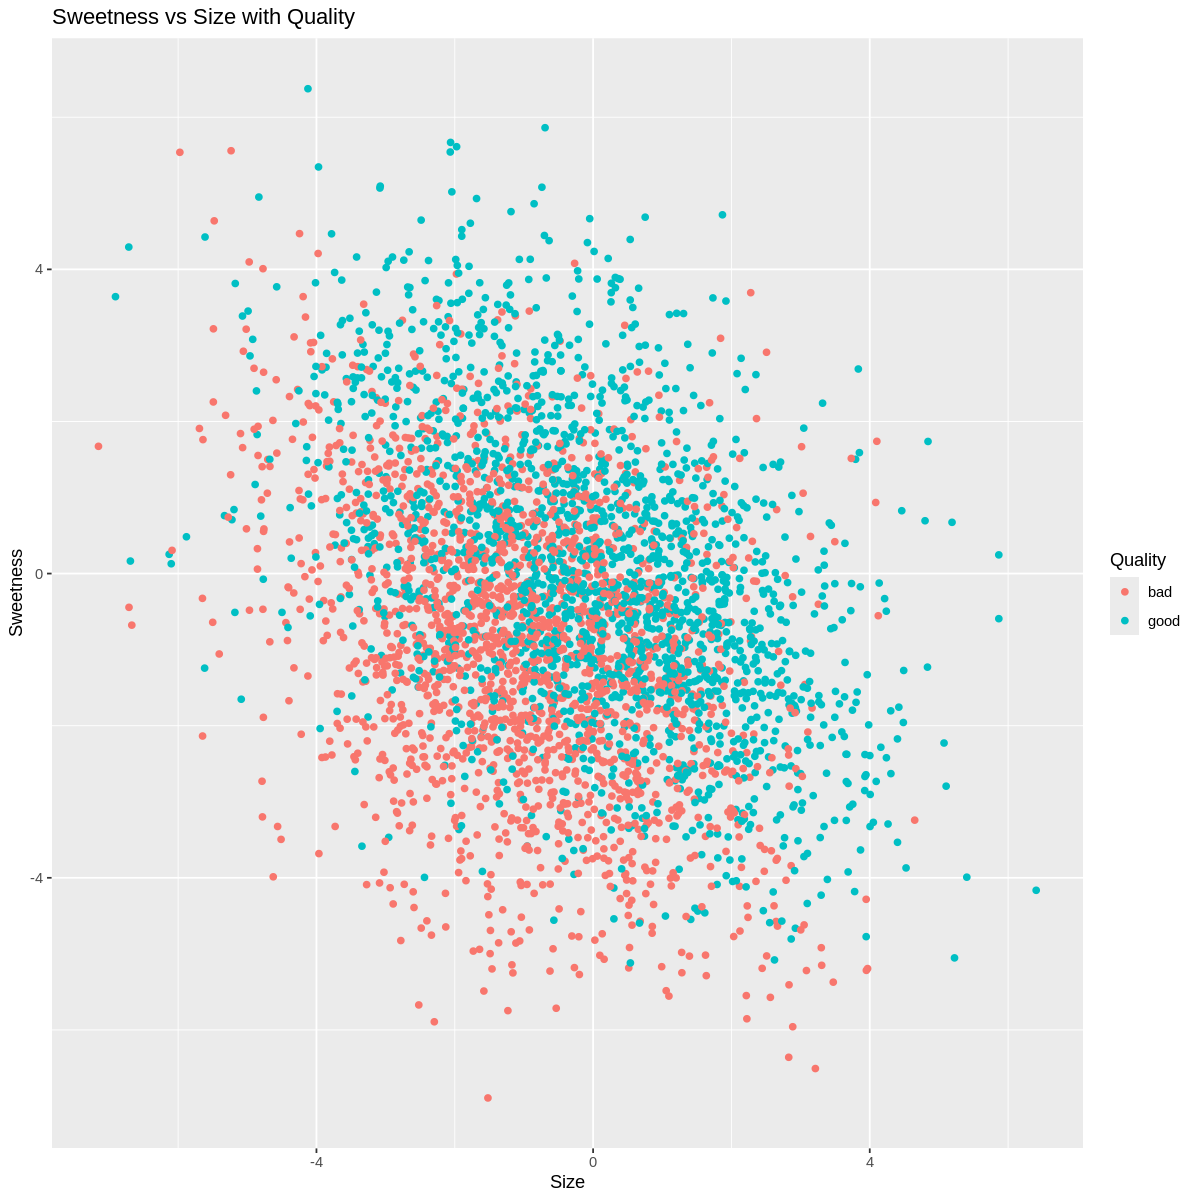

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10)
apple_plot<-apple_data_wrangled|>
    ggplot(aes(x=Size, y=Sweetness, color= Quality)) + 
        geom_point() + 
        ggtitle("Sweetness vs Size with Quality")
cat("Figure 1.2")
apple_plot   

- Splitting dataset into training and testing data

In [7]:
set.seed(422)

apple_split<-initial_split(apple_data_wrangled, prop=0.75, strata= Quality)
apple_train<- training(apple_split)
apple_test<-testing(apple_split)

- Creating the recipe, the K-nearest neighbour classification and workflow

In [8]:
set.seed(93223)
apple_recipe<-recipe(Quality~ ., data=apple_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
apple_recipe

knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |> #Uses a random k-value for now
       set_engine("kknn") |>
       set_mode("classification")

apple_fit<-workflow() |>
       add_recipe(apple_recipe) |>
       add_model(knn_spec) |>
       fit(data = apple_data_wrangled)



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



- Making predictions, calculating metrics, and creating the confusion matrix

In [9]:
set.seed(93223)
apple_test_predictions<- predict(apple_fit, apple_test) |>
       bind_cols(apple_test)

apple_prediction_accuracy<- apple_test_predictions |>
         metrics(truth = Quality, estimate = .pred_class)  
cat("Table 2.1: Accuracy of Our First K-Classification Prediction")
apple_prediction_accuracy

cat("Table 2.2: Confusion Matrix for Our First K-Classification Prediction")
apple_mat<- apple_test_predictions |> 
       conf_mat(truth = Quality, estimate = .pred_class)
apple_mat

Table 2.1: Accuracy of Our First K-Classification Prediction

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9440000
kap,binary,0.8879978


Table 2.2: Confusion Matrix for Our First K-Classification Prediction

          Truth
Prediction bad good
      bad  469   26
      good  30  475

- Cross Validation

In [10]:
apple_vfold<- vfold_cv(apple_train, v = 5, strata = Quality)

set.seed(48990)
apple_resample_fit<- workflow() |>
       add_recipe(apple_recipe) |>
       add_model(knn_spec) |>
       fit_resamples(resamples = apple_vfold)

apple_metrics<-collect_metrics(apple_resample_fit)

cat("Table 3.1: Metrics for V-Fold Estimation")
apple_metrics

Table 3.1: Metrics for V-Fold Estimation

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.8926598,5,0.004342204,Preprocessor1_Model1
roc_auc,binary,0.9419058,5,0.004720176,Preprocessor1_Model1


- Creating the workflow to find best K value

In [11]:
knn_tune<-nearest_neighbor(weight_func= "rectangular", neighbor= tune())|>
    set_engine("kknn")|>
    set_mode("classification")

knn_results <- workflow() |>
       add_recipe(apple_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = apple_vfold, grid = 10) |>
       collect_metrics()
cat("Table 3.2: Metrics for Tuning K-Classification for Different K-Values")
knn_results

Table 3.2: Metrics for Tuning K-Classification for Different K-Values

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8766603,5,0.007184407,Preprocessor1_Model1
1,roc_auc,binary,0.8766303,5,0.007190275,Preprocessor1_Model1
3,accuracy,binary,0.8926598,5,0.004342204,Preprocessor1_Model2
3,roc_auc,binary,0.9419058,5,0.004720176,Preprocessor1_Model2
5,accuracy,binary,0.8959914,5,0.003340439,Preprocessor1_Model3
5,roc_auc,binary,0.9548725,5,0.003732962,Preprocessor1_Model3
7,accuracy,binary,0.8990009,5,0.002652871,Preprocessor1_Model4
7,roc_auc,binary,0.9579854,5,0.002488180,Preprocessor1_Model4
9,accuracy,binary,0.8946686,5,0.005742713,Preprocessor1_Model5


- Creating a graph to estimate the best K value

Figure 2.1: Plot of K-Values vs Accuracy Estimate

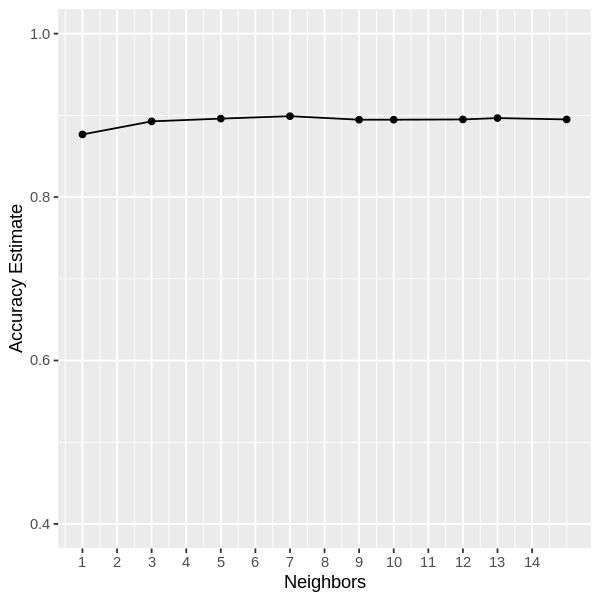

In [12]:
options(repr.plot.width = 5, repr.plot.height = 5)
set.seed(48990)

accuracies<-knn_results |> 
       filter(.metric=="accuracy")

accuracy_versus_k<-ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

cat("Figure 2.1: Plot of K-Values vs Accuracy Estimate")
accuracy_versus_k

- Using the best K value to do k-classification again

In [13]:
set.seed(78493)
apple_recipe<-recipe(Quality~ ., data=apple_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())
apple_recipe

knn_spec_final<- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |> 
       set_engine("kknn") |>
       set_mode("classification")

apple_fit_final<-workflow() |>
       add_recipe(apple_recipe) |>
       add_model(knn_spec) |>
       fit(data = apple_data_wrangled)

apple_test_predictions_final<- predict(apple_fit_final, apple_test) |>
       bind_cols(apple_test)

apple_prediction_accuracy_final<- apple_test_predictions_final |>
         metrics(truth = Quality, estimate = .pred_class)

cat("Table 4.1: Metrics for Final Prediction")
apple_prediction_accuracy_final

apple_mat_final<- apple_test_predictions_final |> 
       conf_mat(truth = Quality, estimate = .pred_class)
cat("Table 4.1: Confusion Matric for Final Prediction")
apple_mat_final




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 7



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Table 4.1: Metrics for Final Prediction

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9440000
kap,binary,0.8879978


Table 4.1: Confusion Matric for Final Prediction

          Truth
Prediction bad good
      bad  469   26
      good  30  475

**Discussion:**

-summarize what you found

-discuss whether this is what you expected to find?

- In our proposal, we stated that we expected to create and experiment with a model that will successfully predict the quality of produce (e.g. apples) based on particular variables. And with this project, we hope that farmers and producers are able to develop their systems and better manage their yearly harvest. These findings allow for further examination of optimal growing conditions to produce the best quality of fruits and vegetables. Thus, producing high quality produce positively impacts the entire supply chain because it is less likely to spoil during transportation and storage which reduces waste and increases profits for all parties involved. Additionally, our findings can serve as a model that could be used to ensure consistency of quality standards. By analyzing variables like size, color, texture, and taste, it can identify deviations from the desired quality, helping maintain uniformity in products. These enhancements often lead to increased consumer satisfaction and loyalty since a model that ensures superior taste, appearance, and freshness enhances the overall eating experience, encouraging repeat purchases.

- These findings open up to a wide variety of opportunities and advancements for the agriculture industry. For example, if we are able to use data to predict the quality of the harvest, can we expand this capability to use more visual cues so it’ll be easier to spot the good quality from the bad? Could we use more advanced technologies like AI which was similarly done in Greece (Apostolopoulo et al, 2023) where they built a model that will predict fruit quality based on images. This model utilized the learning capabilities of advanced image classification networks known as vision transformers (ViT) and is able to differentiate between fresh and spoiled fruit images solely based on visual characteristics, rather than predefined quality metrics. Thus, our model could aid in training and improving the success rates of these technologies. 
Moreover, these findings could delve into understanding the different factors that physically help to grow the best quality of produce such as asking: What are the optimal conditions that produce the best type of fruit or vegetable? For example, an experiment done by scientists in Australia testing how surrounding environments impact the preservation of different types of apples could be an excellent blueprint for this project (Sanad Alsbu et al, 2023). They built a model that examines how temperature during storage and transportation affect the apple’s weight. Such knowledge allowed them to determine the most efficient conditions for these fruits which will immensely help farmers and producers in the long run. 

**References**
- “Wasted Harvest: Unveiling the Global and Local Environmental Impact of Food Waste.” Food Stash Foundation, www.foodstash.ca/wasted-harvest?gad_source=1&gclid=EAIaIQobChMIxN-GlIe2hQMVWyCtBh12dQroEAAYAiAAEgJZGvD_BwE. Accessed 9 Apr. 2024. 
- Sanad Alsbu, Reham Abdullah, et al. “An Empirical Model for Predicting the Fresh Food Quality Changes during Storage.” Foods (Basel, Switzerland), U.S. National Library of Medicine, 24 May 2023, www.ncbi.nlm.nih.gov/pmc/articles/PMC10253207/. 
- Apostolopoulos, Ioannis D., et al. “A General Machine Learning Model for Assessing Fruit Quality Using Deep Image Features.” MDPI, Multidisciplinary Digital Publishing Institute, 27 Sept. 2023, www.mdpi.com/2673-2688/4/4/41. 
- ELGIRIYEWITHANA, NIDULA. “Apple Quality.”11 Jan. 2024, www.kaggle.com/datasets/nelgiriyewithana/apple-quality. Accessed 9 Apr. 2024.
